# **2. PREPARACIÓN PARA ALGORITMOS DE SL**

Este notebook contiene el procesamiento necesario para preparar el dataset para ser usado en algoritmos de SL, mediante el cálculo de nuevas variables, la segmentación del dataset en ventanas de tiempo y la extracción de características estadísticas por ventana.

**2.1 IMPORTACIÓN DE LIBRERIAS**

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import os # Trabajar con carpetas y rutas archivos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [2]:
df_filtrado = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TESIS/FASE OFFLINE/DATASET_ETAPAS_POSTERIORES/dataset_filtrado_suavizado_sin_NAN.xlsx')
df_filtrado

,timestamp,ax,ay,az,gx,gy,gz,accel_freq,gyro_freq,participante,etiqueta,ubicacion,frecuencia_nominal,combinacion,outlier_freq,accel_freq_suavizada
0,2025-05-20T17:41:29.649175,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,20.10,20.10,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
1,2025-05-20T17:41:29.699515,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,19.86,19.86,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
2,2025-05-20T17:41:29.752245,1.098306,3.135196,9.041281,-0.044746,-0.004429,0.040470,19.01,19.01,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08
3,2025-05-20T17:41:29.799432,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,21.13,21.13,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01
4,2025-05-20T17:41:29.849248,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,20.08,20.08,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50848,2025-05-20T17:11:02.034048,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.46,49.46,P5,sentarse,muñeca,50,muñeca - 50,False,51.27
50849,2025-05-20T17:11:02.053553,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,51.27,51.27,P5,sentarse,muñeca,50,muñeca - 50,False,50.22
50850,2025-05-20T17:11:02.073619,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.84,49.84,P5,sentarse,muñeca,50,muñeca - 50,False,49.84
50851,2025-05-20T17:11:02.093533,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,50.22,50.22,P5,sentarse,muñeca,50,muñeca - 50,False,49.84


**2.2 CÁLCULO DE CARACTERÍSTICAS DERIVADAS**

Cálculo de ángulos de inclinación

In [3]:
#Cálculo ángulos de inclinación (pitch y roll) en grados
df_filtrado['pitch'] = np.arctan2(-df_filtrado['ax'], np.sqrt(df_filtrado['ay']**2 + df_filtrado['az']**2)) * 180/np.pi
df_filtrado['roll']  = np.arctan2(df_filtrado['ay'], df_filtrado['az']) * 180/np.pi

df_filtrado


,timestamp,ax,ay,az,gx,gy,gz,accel_freq,gyro_freq,participante,etiqueta,ubicacion,frecuencia_nominal,combinacion,outlier_freq,accel_freq_suavizada,pitch,roll
0,2025-05-20T17:41:29.649175,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,20.10,20.10,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08,-6.547313,19.124735
1,2025-05-20T17:41:29.699515,1.098306,3.135196,9.041281,-0.053603,0.015730,-0.052993,19.86,19.86,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08,-6.547313,19.124735
2,2025-05-20T17:41:29.752245,1.098306,3.135196,9.041281,-0.044746,-0.004429,0.040470,19.01,19.01,P3,caerse,bolsillo,20,bolsillo - 20,False,20.08,-6.547313,19.124735
3,2025-05-20T17:41:29.799432,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,21.13,21.13,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01,-10.964789,17.383529
4,2025-05-20T17:41:29.849248,1.691726,2.608775,8.333005,-0.044746,-0.004429,0.040470,20.08,20.08,P3,caerse,bolsillo,20,bolsillo - 20,False,20.01,-10.964789,17.383529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50848,2025-05-20T17:11:02.034048,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.46,49.46,P5,sentarse,muñeca,50,muñeca - 50,False,51.27,7.749170,30.949757
50849,2025-05-20T17:11:02.053553,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,51.27,51.27,P5,sentarse,muñeca,50,muñeca - 50,False,50.22,7.749170,30.949757
50850,2025-05-20T17:11:02.073619,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,49.84,49.84,P5,sentarse,muñeca,50,muñeca - 50,False,49.84,7.749170,30.949757
50851,2025-05-20T17:11:02.093533,-1.428515,5.398806,9.002995,-0.196851,0.215941,-0.000611,50.22,50.22,P5,sentarse,muñeca,50,muñeca - 50,False,49.84,7.749170,30.949757


**2.3 SEMENTACIÓN POR VENTANAS DE TIEMPO**

Función ventanas tiempo

In [4]:
def generar_ventanas_con_features(df_filtrado, window_size, step_size):
    ventanas = []
    start = 0

    columnas_sensores = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'pitch', 'roll']

    while start + window_size <= len(df_filtrado):
        df_ventana = df_filtrado.iloc[start:start + window_size].copy()

        if len(df_ventana) == 0:
            start += step_size
            continue

        etiqueta_ventana = df_ventana['etiqueta'].mode()[0]

        ventana_data = {
            'start_index': start,
            'end_index': start + window_size - 1,
            'n_muestras': len(df_ventana),
            'etiqueta': etiqueta_ventana
        }

        for col in columnas_sensores:
            ventana_data[f'{col}_mean'] = df_ventana[col].mean()
            ventana_data[f'{col}_std'] = df_ventana[col].std()
            ventana_data[f'{col}_min'] = df_ventana[col].min()
            ventana_data[f'{col}_max'] = df_ventana[col].max()
            ventana_data[f'{col}_range'] = df_ventana[col].max() - df_ventana[col].min()

        acc_mag = np.sqrt(df_ventana['ax']**2 + df_ventana['ay']**2 + df_ventana['az']**2)
        ventana_data['acc_mag_mean'] = acc_mag.mean()
        ventana_data['acc_mag_std'] = acc_mag.std()
        ventana_data['acc_mag_min'] = acc_mag.min()
        ventana_data['acc_mag_max'] = acc_mag.max()
        ventana_data['acc_mag_range'] = acc_mag.max() - acc_mag.min()

        ventanas.append(ventana_data)
        start += step_size

    return pd.DataFrame(ventanas)

Segmentación del dataset por combinación (ubicación + frecuencia)

Para cada grupo:

50Hz → ventana de 100, paso 50

20Hz → ventana de 40, paso 20

Aplica la función generar_ventanas_con_features

In [5]:
#Crear la carpeta donde se almacenarán las ventanas
os.makedirs("ventanas_csv", exist_ok=True)

# Diccionario para guardar los resultados
ventanas_por_grupo = {}

# Obtener los grupos únicos por combinación
grupos = df_filtrado['combinacion'].unique()

# Recorrer cada grupo
for grupo in grupos:
    df_g = df_filtrado[df_filtrado['combinacion'] == grupo]

    # Detectar si es 20Hz o 50Hz y definir tamaños
    if '20' in grupo:
        window_size = 40
    elif '50' in grupo:
        window_size = 100
    else:
        print(f" No se reconoce la frecuencia en {grupo}, se omite.")
        continue

    step_size = window_size // 2  # Solapamiento del 50%

    # Aplicar función de ventanas
    df_features = generar_ventanas_con_features(df_g, window_size, step_size)

    # Guardar en diccionario
    ventanas_por_grupo[grupo] = df_features

    # Guardar como CSV
    nombre_archivo = f"ventanas_csv/ventanas_{grupo.replace(' ', '').replace('-', '_')}.csv"
    df_features.to_csv(nombre_archivo, index=False)

    print(f" Procesado grupo: {grupo} → {df_features.shape[0]} ventanas")
    print(f" Guardado en: {nombre_archivo}")

 Procesado grupo: bolsillo - 20 → 398 ventanas
 Guardado en: ventanas_csv/ventanas_bolsillo_20.csv
 Procesado grupo: bolsillo - 50 → 343 ventanas
 Guardado en: ventanas_csv/ventanas_bolsillo_50.csv
 Procesado grupo: muñeca - 20 → 411 ventanas
 Guardado en: ventanas_csv/ventanas_muñeca_20.csv
 Procesado grupo: muñeca - 50 → 346 ventanas
 Guardado en: ventanas_csv/ventanas_muñeca_50.csv


**2.5 VALIDACIÓN DE RESULTADOS**

In [6]:
# Diccionario de rutas
archivos = {
    'muñeca - 20Hz': 'ventanas_csv/ventanas_muñeca_20.csv',
    'muñeca - 50Hz': 'ventanas_csv/ventanas_muñeca_50.csv',
    'bolsillo - 20Hz': 'ventanas_csv/ventanas_bolsillo_20.csv',
    'bolsillo - 50Hz': 'ventanas_csv/ventanas_bolsillo_50.csv'
}

# Recorrer y mostrar detalles
for nombre, ruta in archivos.items():
    print(f"\n Archivo: {nombre}")
    df = pd.read_csv(ruta)

    print(f" Shape: {df.shape}")
    print(" Columnas:", df.columns.tolist())
    print("Head:")
    print(df.head())

    print(" Distribución de etiquetas:")
    print(df['etiqueta'].value_counts())



 Archivo: muñeca - 20Hz
 Shape: (411, 49)
 Columnas: ['start_index', 'end_index', 'n_muestras', 'etiqueta', 'ax_mean', 'ax_std', 'ax_min', 'ax_max', 'ax_range', 'ay_mean', 'ay_std', 'ay_min', 'ay_max', 'ay_range', 'az_mean', 'az_std', 'az_min', 'az_max', 'az_range', 'gx_mean', 'gx_std', 'gx_min', 'gx_max', 'gx_range', 'gy_mean', 'gy_std', 'gy_min', 'gy_max', 'gy_range', 'gz_mean', 'gz_std', 'gz_min', 'gz_max', 'gz_range', 'pitch_mean', 'pitch_std', 'pitch_min', 'pitch_max', 'pitch_range', 'roll_mean', 'roll_std', 'roll_min', 'roll_max', 'roll_range', 'acc_mag_mean', 'acc_mag_std', 'acc_mag_min', 'acc_mag_max', 'acc_mag_range']
Head:
   start_index  end_index  n_muestras etiqueta   ax_mean    ax_std    ax_min  \
0            0         39          40   caerse -0.653001  1.535210 -3.093920   
1           20         59          40   caerse -1.523749  1.266419 -4.036692   
2           40         79          40   caerse -0.523071  1.826361 -4.036692   
3           60         99          40 

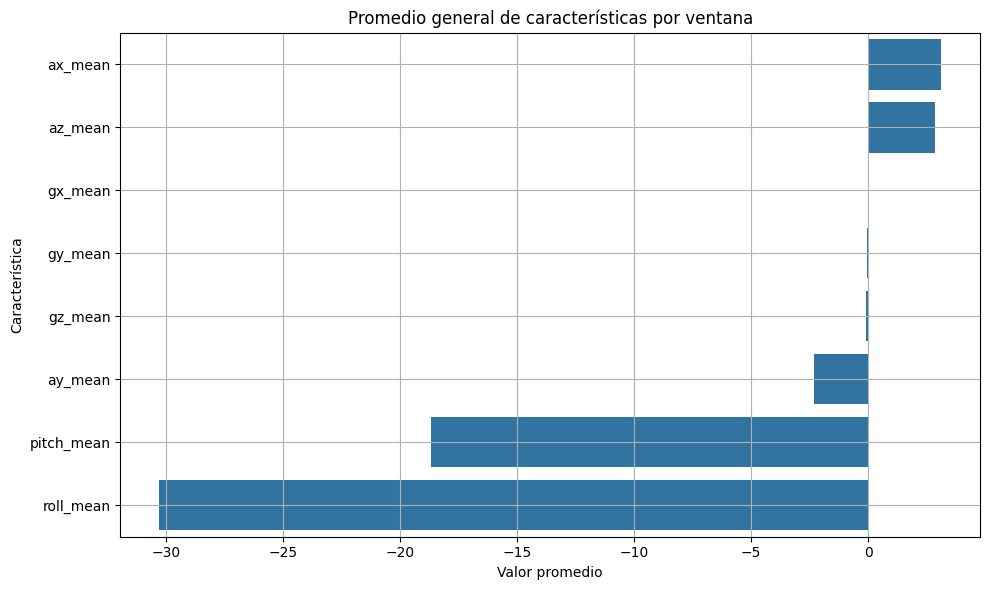

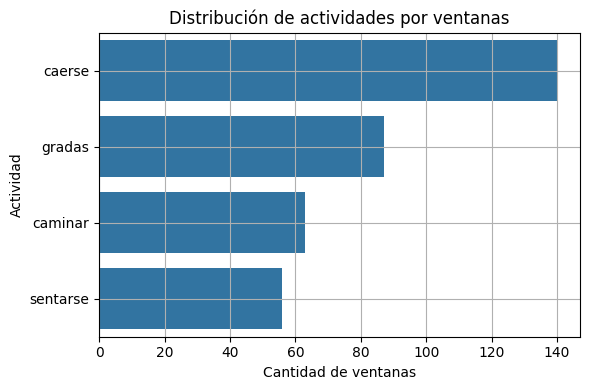

In [7]:
# GRÁFICA 1: Promedio general de características por ventana
feature_cols = [col for col in df_features.columns if '_mean' in col and col != 'acc_mag_mean']
df_means = df_features[feature_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=df_means.values, y=df_means.index)
plt.title("Promedio general de características por ventana")
plt.xlabel("Valor promedio")
plt.ylabel("Característica")
plt.grid(True)
plt.tight_layout()
plt.show()

# GRÁFICA 2: Distribución de etiquetas por ventana
plt.figure(figsize=(6, 4))
sns.countplot(data=df_features, y='etiqueta', order=df_features['etiqueta'].value_counts().index)
plt.title("Distribución de actividades por ventanas")
plt.xlabel("Cantidad de ventanas")
plt.ylabel("Actividad")
plt.grid(True)
plt.tight_layout()
plt.show()

Generando gráficas para: ventanas_csv/ventanas_muñeca_20.csv


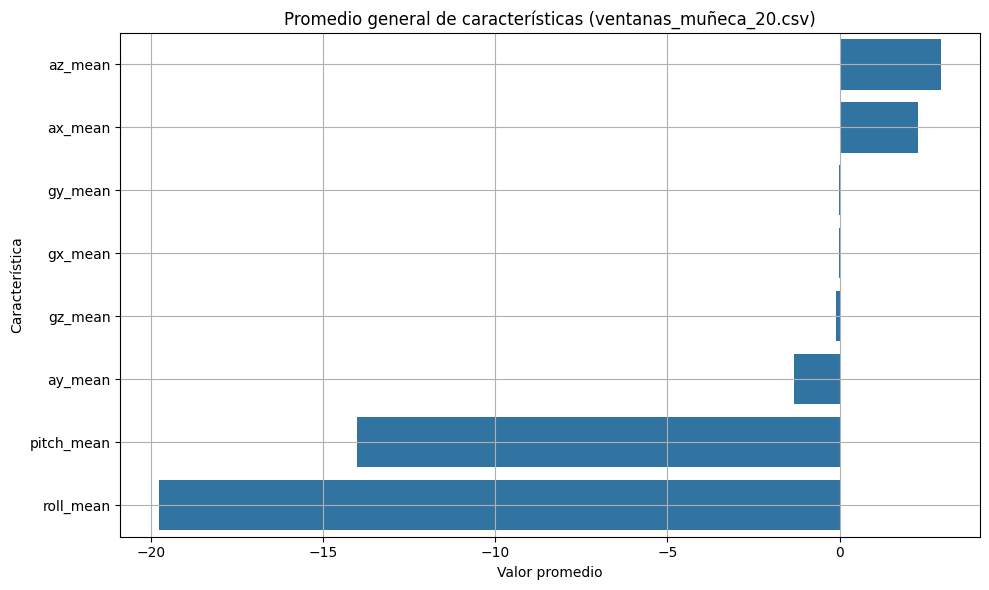

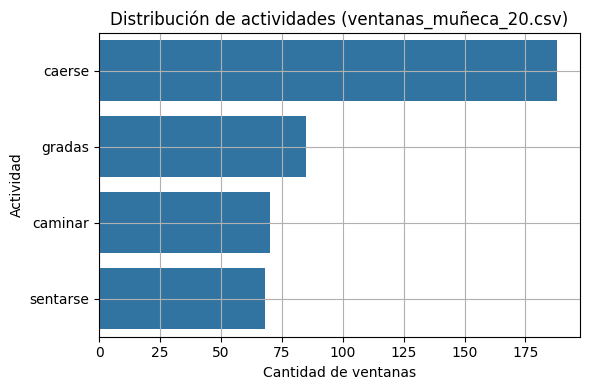

Generando gráficas para: ventanas_csv/ventanas_muñeca_50.csv


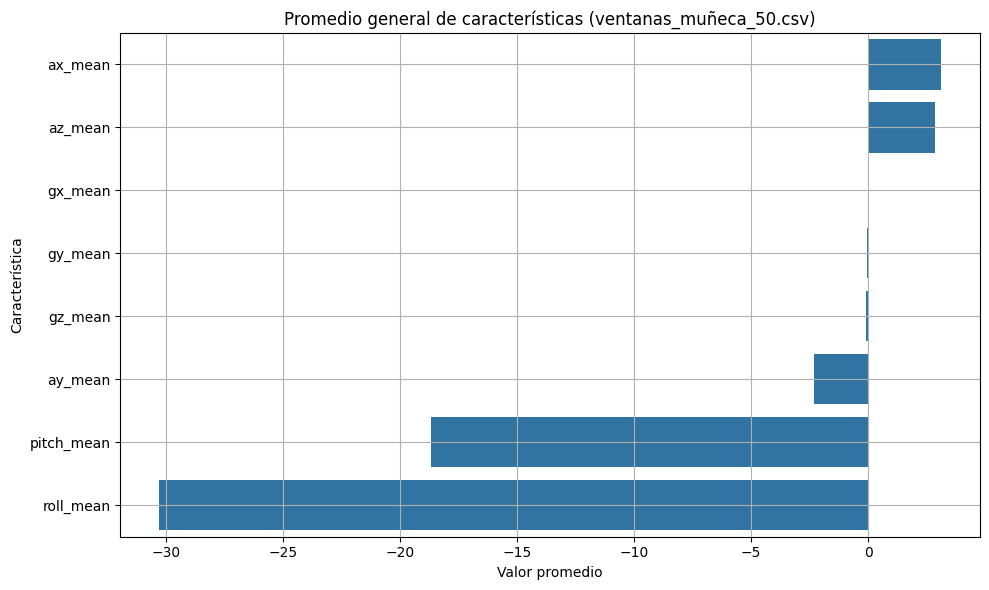

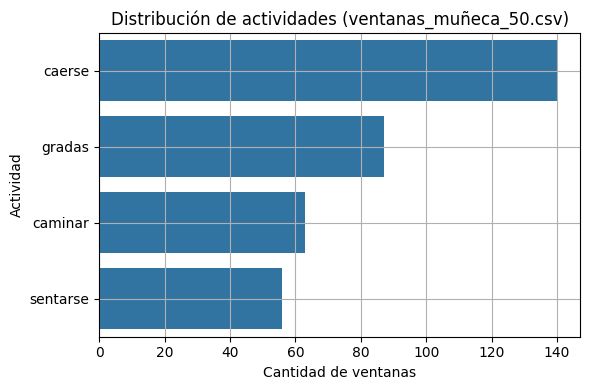

Generando gráficas para: ventanas_csv/ventanas_bolsillo_20.csv


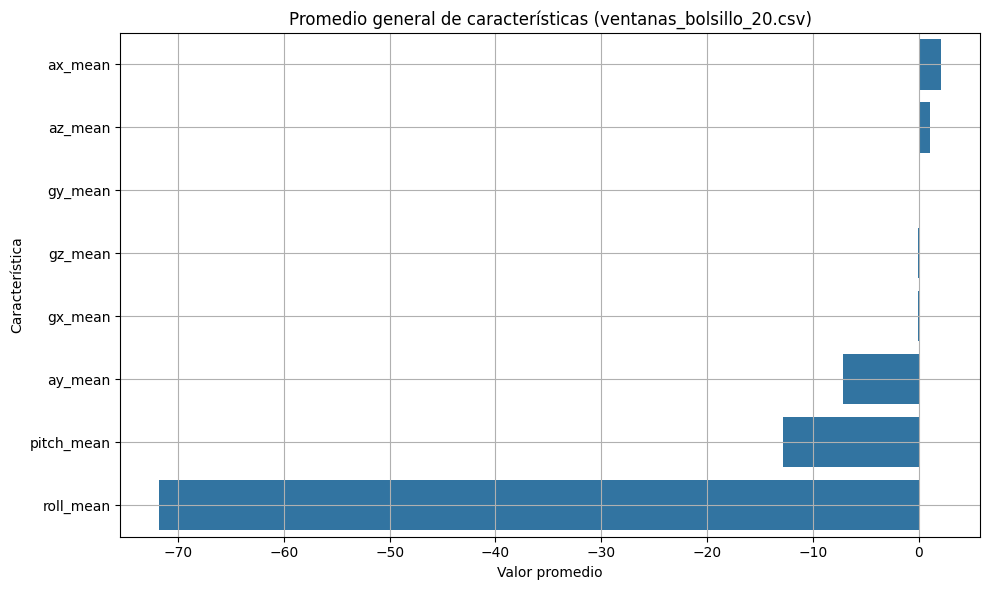

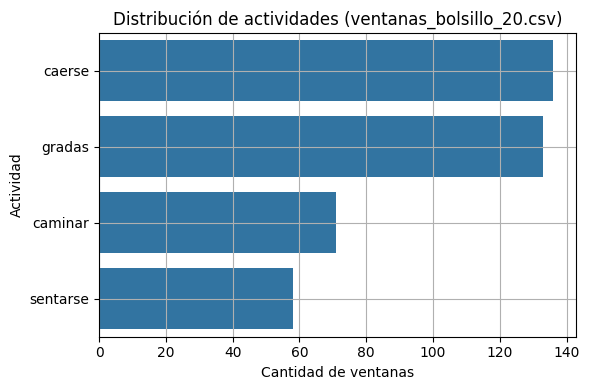

Generando gráficas para: ventanas_csv/ventanas_bolsillo_50.csv


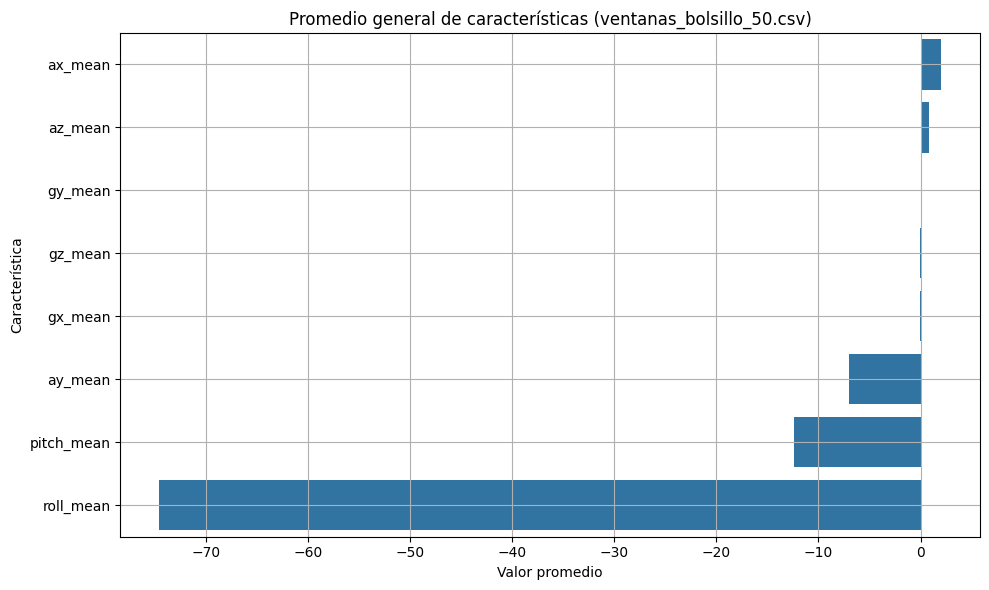

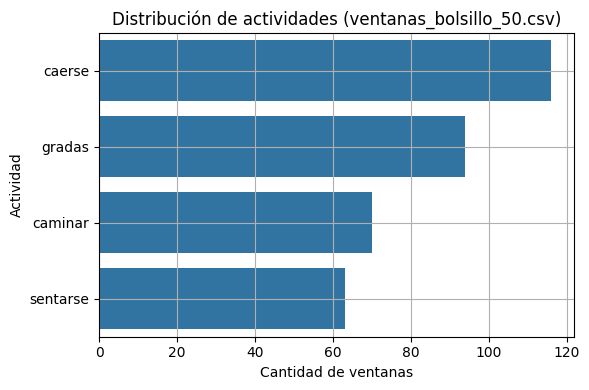

In [8]:
archivos = [
    "ventanas_csv/ventanas_muñeca_20.csv",
    "ventanas_csv/ventanas_muñeca_50.csv",
    "ventanas_csv/ventanas_bolsillo_20.csv",
    "ventanas_csv/ventanas_bolsillo_50.csv"
]

# Gráficas para cada archivo
for ruta in archivos:
    df_features = pd.read_csv(ruta)
    print(f"Generando gráficas para: {ruta}")

    # Promedios
    feature_cols = [col for col in df_features.columns if '_mean' in col and col != 'acc_mag_mean']
    df_means = df_features[feature_cols].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=df_means.values, y=df_means.index)
    plt.title(f"Promedio general de características ({ruta.split('/')[-1]})")
    plt.xlabel("Valor promedio")
    plt.ylabel("Característica")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Etiquetas
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_features, y='etiqueta', order=df_features['etiqueta'].value_counts().index)
    plt.title(f"Distribución de actividades ({ruta.split('/')[-1]})")
    plt.xlabel("Cantidad de ventanas")
    plt.ylabel("Actividad")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
